# Alloy bending
The company Steelco has received an order for 500 tons of steel to be used in
shipbuilding. The steel must have the following characteristics: <br>

|Chemical(Element)|Minimum Grade(%)|Maximum Grade(%)|
|-----------------|----------------|----------------|
|Carbon(C)        |2               |3               |
|Copper(Cu)       |0.4             |0.6             |
|Manganese(Mn)    |1.2             |1.65            |

The company has seven different raw materials in stock that may be used for the production of
this steel. The following table lists the grades, available amounts and prices for all materials:<br>

|Raw Material| C%     | Cu%     | Mn%    | Availability (tons)| Cost ($/ton)|
|------------|--------|---------|--------|--------------------|-------------|
|Iron alloy 1| 2.5    | &nbsp;  | 1.3    | 400                | 200         |
|Iron alloy 2| 3      | &nbsp;  | 0.8    | 300                | 250         |
|Iron alloy 3| &nbsp; | 0.3     | &nbsp; | 600                | 150         |
|Copper 1    | &nbsp; | 90      | &nbsp; | 500                | 220         |
|Copper 2    | &nbsp; | 96      | 4      | 200                | 240         |
|Aluminum 1  | &nbsp; | 0.4     | 1.2    | 300                | 200         |
|Aluminum 2  | &nbsp; | 0.6     | &nbsp; | 250                | 165         |

### Determine the composition of the steel that minimizes the production cost 

In [2]:
# Load the gams extension
%load_ext gams_magic

# Enable plots to be shown in notebook
%matplotlib inline

The gams_magic extension is already loaded. To reload it, use:
  %reload_ext gams_magic


__The GAMS Model:__

In [3]:
%%gams
Set
    i 'Elements'  / C, Cu, Mn /    
    k 'Grades'  / min, max /    
    j 'Raw Material'  / Iron_alloy
                        Iron_alloy_2
                        Iron_alloy_3
                        Copper_1
                        Copper_2
                        Aluminum_1
                        Aluminum_2 /;
 
Table req(i,k) 'characteristics (requirements)'
              min      max
        C      2        3
        Cu    0.4      0.6
        Mn    1.2      1.65;

Table m(j,i) 'materials'
                         C   Cu   Mn
        Iron_alloy      2.5   0   1.3
        Iron_alloy_2    3     0   0.8
        Iron_alloy_3    0    0.3  0
        Copper_1        0    90   0
        Copper_2        0    96   4
        Aluminum_1      0    0.4  1.2
        Aluminum_2      0    0.6  0; 
  
Parameter
    tons(j) 'Availability (tons)'
      / Iron_alloy      400    
        Iron_alloy_2    300
        Iron_alloy_3    600
        Copper_1        500
        Copper_2        200
        Aluminum_1      300
        Aluminum_2      250 /
 
    cost(j) 'Cost ($/tons)'
      / Iron_alloy      200    
        Iron_alloy_2    250
        Iron_alloy_3    150
        Copper_1        220
        Copper_2        240
        Aluminum_1      200
        Aluminum_2      165 /

Variables
    x(j) 'tons of j used in the optimal steel composition'
    z    'total cost';
   
Positive Variable x;  

Equation
    obj 'calculate the cost of the optimal steel composition'
    min_grade(i) 'minimum grade of i'
    max_grade(i) 'maximum grade of i'
    available(j) 'Raw material used must be less than the available j'
    size         '500 tons of steel';
    
    min_grade(i).. sum(j,x(j)*m(j,i)) =g= req(i,'min')*500;
    max_grade(i).. sum(j,x(j)*m(j,i)) =l= req(i,'max')*500;
    available(j).. x(j) =l= tons(j);
    size.. sum(j,x(j)) =e= 500;
    obj.. sum(j,x(j)*cost(j)) =e= z;


model prob /all/;

Options LP  = Cplex;

Solve prob using LP minimizing z;

display z.l, x.l;

,Solver Status,Model Status,Objective,#equ,#var,Model Type,Solver,Solver Time
0,Normal (1),Optimal Global (1),98121.6358,15,8,LP,CPLEX,0.016


__Pull the variable values from GAMS and create a pie chart for the compounds of the optimal steel:__

In [5]:
# Pull the values of x from GAMS to Python as a pandas dataframe
%gams_pull -d x
x

,j,level,marginal,lower,upper,scale
0,Iron_alloy,400.000000,0.000000,0.0,inf,1.0
1,Iron_alloy_2,0.000000,66.371898,0.0,inf,1.0
2,Iron_alloy_3,39.776302,0.000000,0.0,inf,1.0
3,Copper_1,0.000000,142.111150,0.0,inf,1.0
4,Copper_2,2.761272,0.000000,0.0,inf,1.0
5,Aluminum_1,57.462426,0.000000,0.0,inf,1.0
6,Aluminum_2,0.000000,15.241174,0.0,inf,1.0


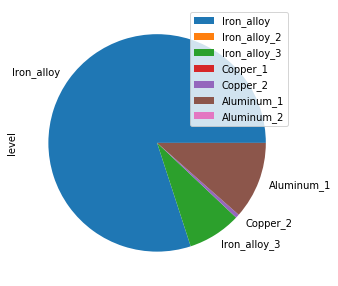

In [6]:
# Reset index to j
x = x.set_index('j')
plot = x.plot.pie(y='level', figsize=(5, 5))
plot